In [85]:
import pandas as pd

In [86]:
hd = pd.read_csv('Heart Disease.csv')

In [87]:
hd.shape

(303, 14)

In [88]:
hd.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [90]:
hd.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [91]:
hd.select_dtypes(include='object').columns

Index([], dtype='object')

### Sampling

In [92]:
from sklearn.model_selection import train_test_split
train_hd, test_hd = train_test_split(hd,test_size=0.2)

In [93]:
print(hd.shape,train_hd.shape, test_hd.shape)

(303, 14) (242, 14) (61, 14)


In [94]:
train_hd_x = train_hd.iloc[:,:-1]
train_hd_y = train_hd.iloc[:,-1]

In [95]:
test_hd_x = test_hd.iloc[:,:-1]
test_hd_y = test_hd.iloc[:,-1]

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4, min_samples_split= 30)

In [161]:
dt.fit(train_hd_x,train_hd_y)

DecisionTreeClassifier(max_depth=4, min_samples_split=30)

In [162]:
pred_dt = dt.predict(test_hd_x)
pred_dt

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [163]:
from sklearn.metrics import confusion_matrix, precision_score,f1_score,recall_score

### Confusion Matrix

In [164]:
tab = confusion_matrix(test_hd_y,pred_dt)
tab

array([[16,  5],
       [ 8, 32]], dtype=int64)

### Precision

In [165]:
precision_score(test_hd_y,pred_dt)

0.8648648648648649

### F1_SCore

In [166]:
f1_score(test_hd_y,pred_dt)

0.8311688311688312

### Recall SCore

In [167]:
recall_score(test_hd_y,pred_dt)

0.8

### Important Feature

In [168]:
dt.feature_importances_

array([0.05751073, 0.00226431, 0.42086984, 0.01846418, 0.03209266,
       0.        , 0.        , 0.06087142, 0.        , 0.09464009,
       0.        , 0.15672987, 0.15655689])

In [169]:
feat_imp = pd.DataFrame()

In [170]:
feat_imp['Feature'] = hd.columns[:-1]
feat_imp['feat_imp'] = dt.feature_importances_

In [171]:
feat_imp.sort_values('feat_imp',ascending= False)

,Feature,feat_imp
2,chest_pain,0.420870
11,ca,0.156730
12,thalassemia,0.156557
9,old_peak,0.094640
7,thalach,0.060871
0,age,0.057511
4,cholestrol,0.032093
3,rest_bps,0.018464
1,gender,0.002264
5,fasting_blood_sugar,0.000000


In [172]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image 
from six import StringIO

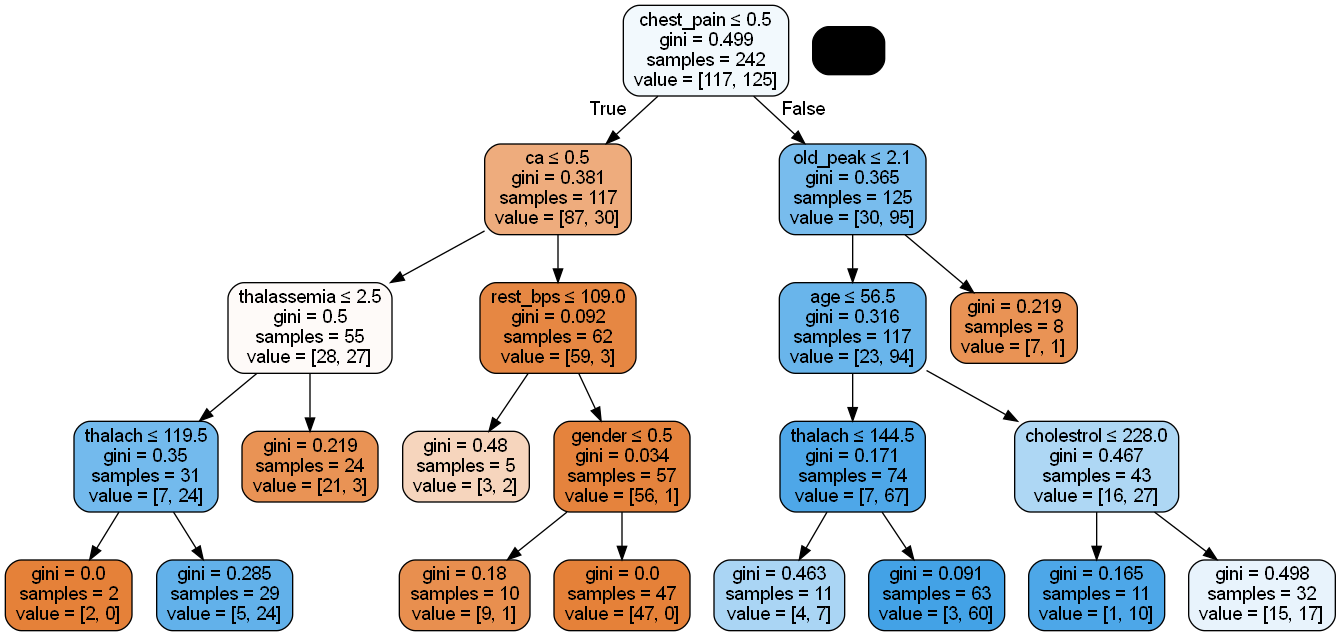

<Figure size 1200x1200 with 0 Axes>

In [173]:
dot_data = StringIO()  ## creating a empty  file 
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=train_hd_x.columns  )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())